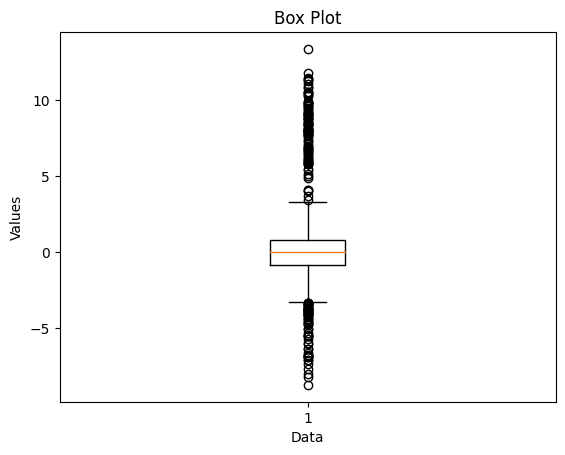

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#데이터 생성
data = np.concatenate([np.random.normal(0, 1, 900),
                      np.random.normal(8, 2, 100),
                      np.random.normal(-4, 2, 100)])

#상자 그림(Box Plot) 시각화
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xlabel('Data')
ax.set_ylabel('Values')
ax.set_title('Box Plot')
plt.show()

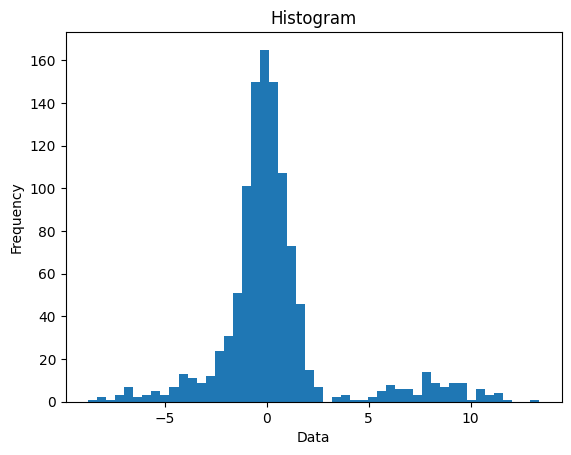

In [2]:
# 히스토그램(Histogram) 시각화
fig, ax = plt.subplots()
ax.hist(data, bins=50)
ax.set_xlabel('Data')
ax.set_ylabel('Frequency')
ax.set_title('Histogram')
plt.show()